# PRACTICE PROJECT#1: RED WINE 
Importing necessary libraries

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import scipy
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [224]:
#Loading the file which is already present in Jupyter notebook.
df=pd.read_csv("winequality_red.csv")
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [190]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [124]:
df.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

1.  After examining the dataset, we can conclude that all the columns contain numerical values.  The target or quantity column also is numeric.
2.  We can note that the target which is quality has 6 different values in terms of quality. It can be classification problem
as total number of rows and unique values in label/target have a huge difference. 
3. Also, on the basis of target column having just 6 numeric values, we can term this as regression (Logistic regression).  


# EXPLORATORY DATA ANALYSIS(EDA)

FEATURE ENGINEERING

In [125]:
df.shape

(1599, 12)

The dataset contains 1599 rows and 12 columns. 

In [126]:
df.keys() #columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

This dataset has 12 columns, the last column
is the target or label which is quality and is dependent on all the other 11 columns which are independent variables.
Features=independent variables.

In [127]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

There are 2 different data types here, float64 and int64.

In [128]:
df.columns.tolist() #we can save the features in a list also, so that features can be referred as list item.

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [129]:
df.isnull().sum() #checking if the dataset contains any null values.

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

So, from here, we can interpret that there are no null values present here in the dataset.

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


We can note that all the 12 columns do not have null values and memory usage is 150.0 KB, range is 0 to 1598.   

<AxesSubplot:>

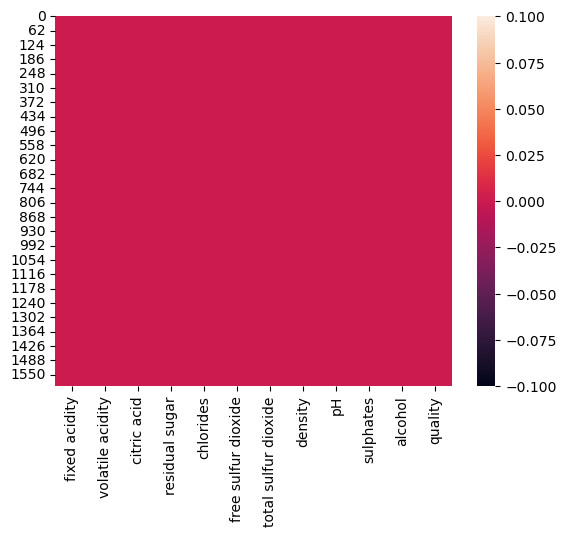

In [131]:
sns.heatmap(df.isnull())

From the plot, we can clearly say that it is showing uniform color and the value representing this color is 0.00
and no null values present.

In [132]:
#Checking value counts(frequency or how many times the value is repeating) of each column separtely, we can iterate each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0

We can see from the above that fixed acidity has 96 total values and datatype of int, volatile acidity has a lenght of 143 and citric acid with lenght of 80 and datatype64, so on for others. 

Also from here, we note that there are no whitespaces present in any of the columns

In [133]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [134]:
df['quality'].nunique()

6

In [135]:
df.nunique().to_frame("No: of unique values")

No: of unique values
fixed acidity                           96
volatile acidity                       143
citric acid                             80
residual sugar                          91
chlorides                              153
free sulfur dioxide                     60
total sulfur dioxide                   144
density                                436
pH                                      89
sulphates                               96
alcohol                                 65
quality                                  6

There are 6 unique values having different values in the target variable and datatype is integer.  Therefore Range of target is 5. Here it clearly indicates this is a categorical based problem.

# Statistical Summary of the dataset

In [191]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

1.  All the columns have equal counts, so there are no missing rows.
2.  Mean is greater than median in total sufur dioxide, so there is right-sided skewness, and other columns, we can see
    there is not much of a difference, so a minor skewness can be noted.
3.  Standard deviation is almost 1 or less than 1 in most cases and just in 2 columns, we can see high value such as in 
    free sulfur dioxide and total sulfur dioxide, which means here, the data is spread widely.
4.  From maximum values and the 75%, we can see that there are more outliers present in fixed acidity, residual sugar, free sulfur dioxide, total sulfur dioxide, and alcohol level.
5.  There are mo negative values in the description, so it is a perfect summary.
    

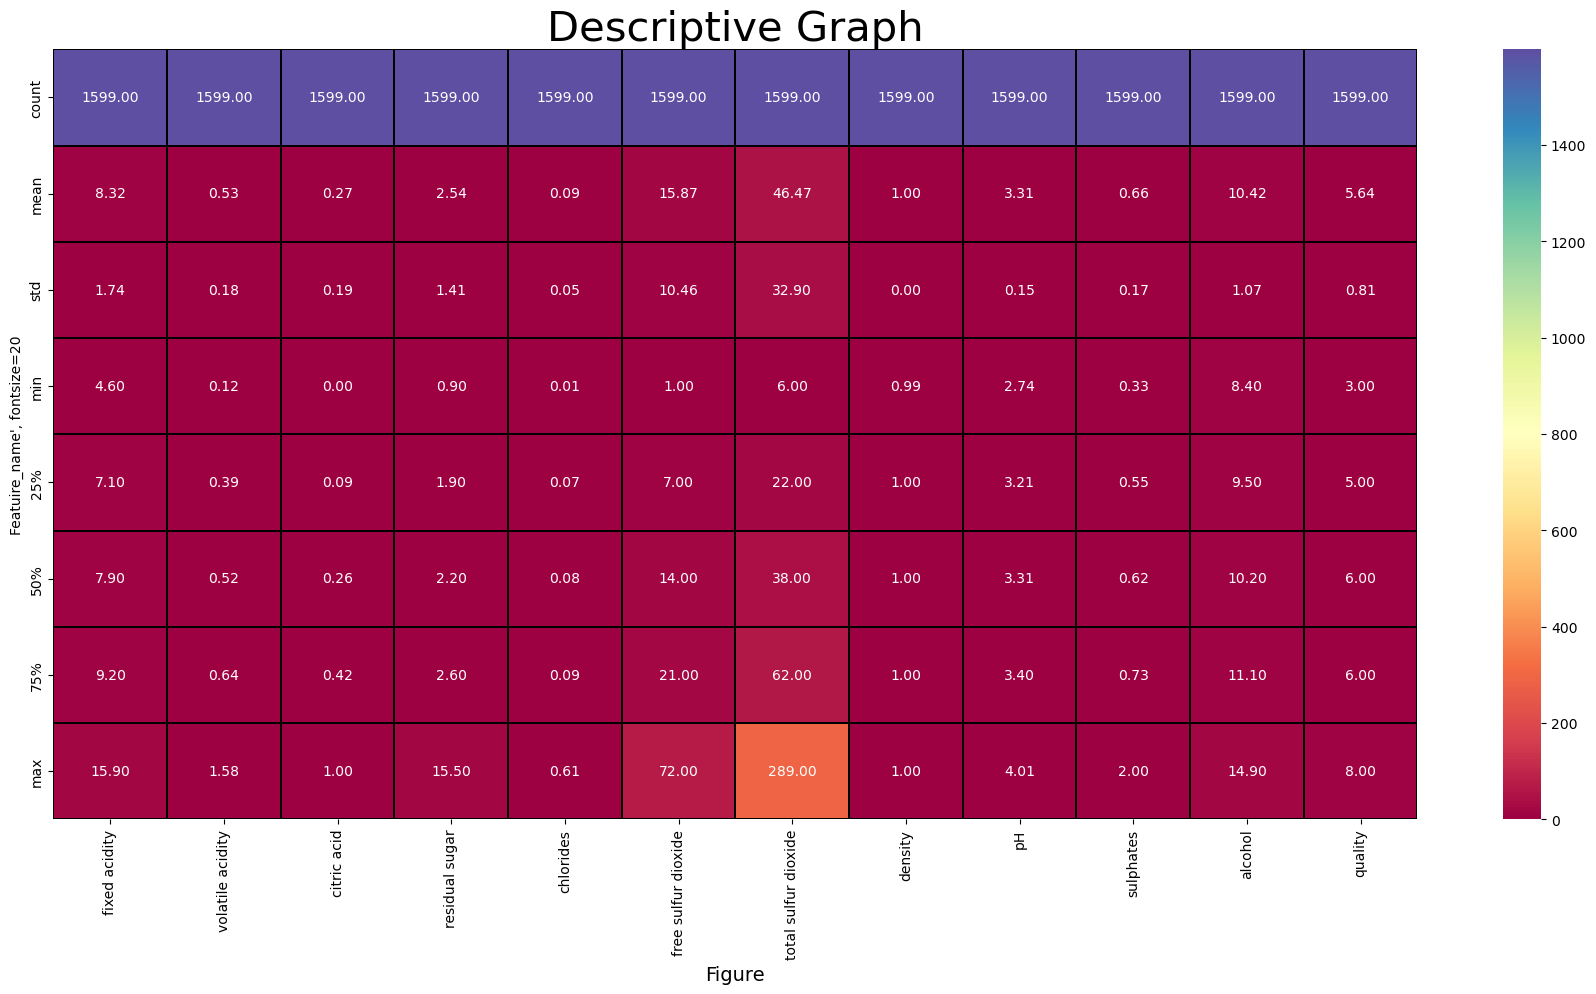

In [17]:
plt.figure(figsize=(22, 10))
sns.heatmap(df.describe(), annot=True, fmt='0.2f', linewidth=0.2, linecolor='black', cmap='Spectral')
plt.xlabel('Figure', fontsize=14)
plt.ylabel("Featuire_name', fontsize=20")
plt.title("Descriptive Graph", fontsize=30)
plt.show()


The graph shows statistical analysis of the report as described above in descriptive analysis.

# GRAPHICAL EDA (graphical exploratory analysis)

# Univariate Analysis,(using only one column for analysis)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


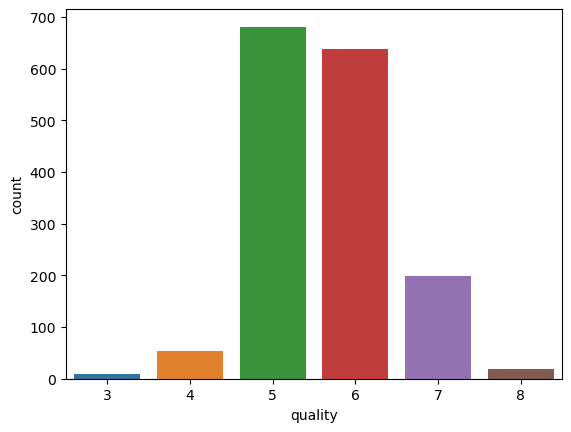

In [18]:
ax=sns.countplot(x='quality', data=df)
print(df['quality'].value_counts())

The above graph shows the count of the 6 different qualities of wine, 5 and 6 qualities have the maximum counts, whereas 3 and 8 
have the lower counts.

# Historgram Charts

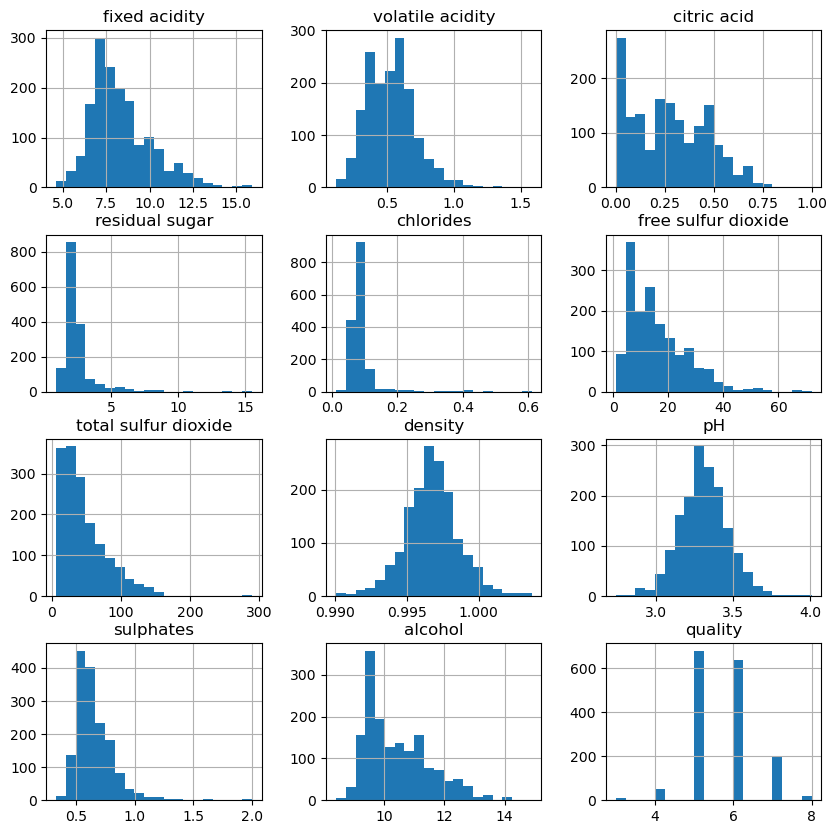

In [19]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

Total sulfur dioxide and free sulfur dioxide are right skewed here and even density is also does not have a normal curve.

# Boxplot is also a univariate analysis used to detect outliers present int he dataset

fixed acidity              AxesSubplot(0.125,0.53;0.065678x0.35)
volatile acidity        AxesSubplot(0.203814,0.53;0.065678x0.35)
citric acid             AxesSubplot(0.282627,0.53;0.065678x0.35)
residual sugar          AxesSubplot(0.361441,0.53;0.065678x0.35)
chlorides               AxesSubplot(0.440254,0.53;0.065678x0.35)
free sulfur dioxide     AxesSubplot(0.519068,0.53;0.065678x0.35)
total sulfur dioxide    AxesSubplot(0.597881,0.53;0.065678x0.35)
density                 AxesSubplot(0.676695,0.53;0.065678x0.35)
pH                      AxesSubplot(0.755508,0.53;0.065678x0.35)
sulphates               AxesSubplot(0.834322,0.53;0.065678x0.35)
alcohol                    AxesSubplot(0.125,0.11;0.065678x0.35)
quality                 AxesSubplot(0.203814,0.11;0.065678x0.35)
dtype: object

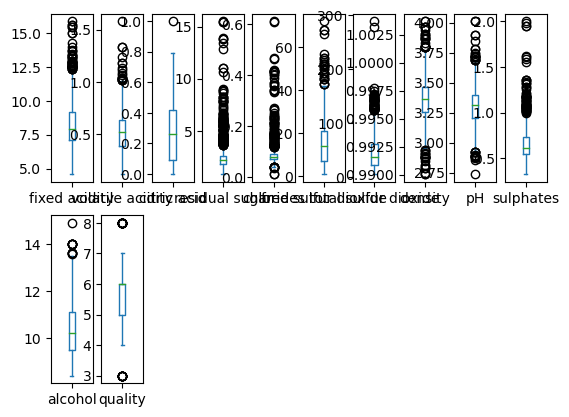

In [20]:
df.plot(kind='box' , subplots=True, layout=(2,10))

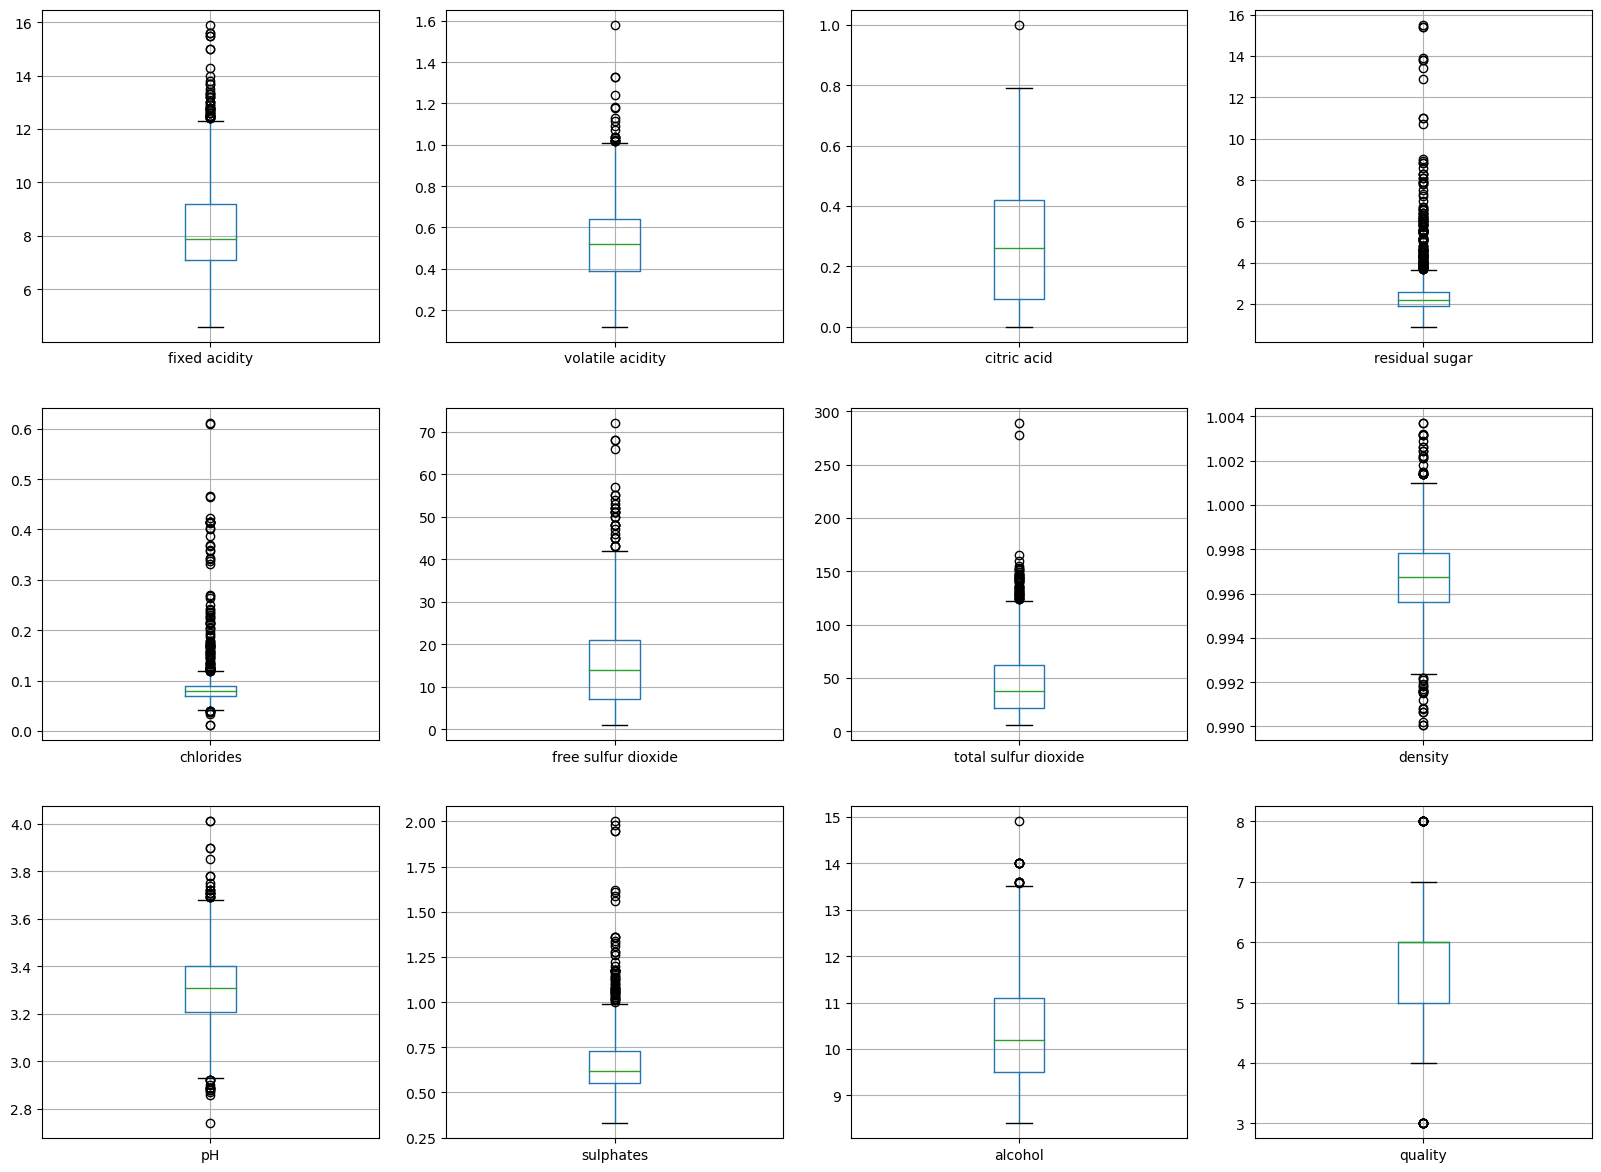

In [21]:
plt.figure(figsize=(20, 25))
p=1
for column in df:
    if p<=17:
        plt.subplot(5,4,p)
        df.boxplot([column])
    p+=1
plt.show()


From the above boxplot, we can identify outliers present in all the columns except citric acid and alcohol variables. Outliers
need to be removed using the zscore.

In [225]:
from scipy.stats import zscore
out_features=df[['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']]
z=np.abs(zscore(out_features)) #Threshold of zcore is 3
z

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.528360          0.961877     1.391472        0.453218   0.243707   
1          0.298547          1.967442     1.391472        0.043416   0.223875   
2          0.298547          1.297065     1.186070        0.169427   0.096353   
3          1.654856          1.384443     1.484154        0.453218   0.264960   
4          0.528360          0.961877     1.391472        0.453218   0.243707   
...             ...               ...          ...             ...        ...   
1594       1.217796          0.403229     0.980669        0.382271   0.053845   
1595       1.390155          0.123905     0.877968        0.240375   0.541259   
1596       1.160343          0.099554     0.723916        0.169427   0.243707   
1597       1.390155          0.654620     0.775267        0.382271   0.264960   
1598       1.332702          1.216849     1.021999        0.752894   0.434990   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0                0.466193              0.379133  0.558274  1.288643   
1                0.872638              0.624363  0.028261  0.719933   
2                0.083669              0.229047  0.134264  0.331177   
3                0.107592              0.411500  0.664277  0.979104   
4                0.466193              0.379133  0.558274  1.288643   
...                   ...                   ...       ...       ...   
1594             1.542054              0.075043  0.978765  0.899886   
1595             2.211469              0.137820  0.862162  1.353436   
1596             1.255161              0.196679  0.533554  0.705508   
1597             1.542054              0.075043  0.676657  1.677400   
1598             0.203223              0.135861  0.666057  0.511130   

      sulphates   alcohol  
0      0.579207  0.960246  
1      0.128950  0.584777  
2      0.048089  0.584777  
3      0.461180  0.584777  
4      0.579207  0.960246  
...         ...       ...  
1594   0.461180  0.072294  
1595   0.601055  0.729364  
1596   0.542042  0.541630  
1597   0.305990  0.209308  
1598   0.010924  0.541630  

[1599 rows x 11 columns]

In [151]:
np.where(z>3)


(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
         557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
         649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
         695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
         889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
        1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
        1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
        1270, 1270, 1288, 1289, 1295, 

In [152]:
z.iloc[13,9] #Zscore is greater than 3, so there is outlier at the 13th row and 9th column

5.32210116796055

In [154]:
#Removing all the valuse of z>3 and considering z<3
df1=df[(z<3).all(axis=1)]
df1.shape

(1458, 12)

In [153]:
df.shape

(1599, 12)

In [ ]:
#x1=x[(z<3).all(axis=1)]
#y1=y[(z<3).all(axis=1)]
#df=df[(z<3).all(axis=1)]
#df=df[(z<3).all(axis=1)]

In [155]:
print("Old DataFrame:", df.shape[0])
print("New DataFrame:", df1.shape[0])
print("Dataloss percentage:", ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Old DataFrame: 1599
New DataFrame: 1458
Dataloss percentage: 8.818011257035648


We have 8% data loss here.

In [156]:
df=df1

# Bivariate Analysis(using 2 columns for the analysis)

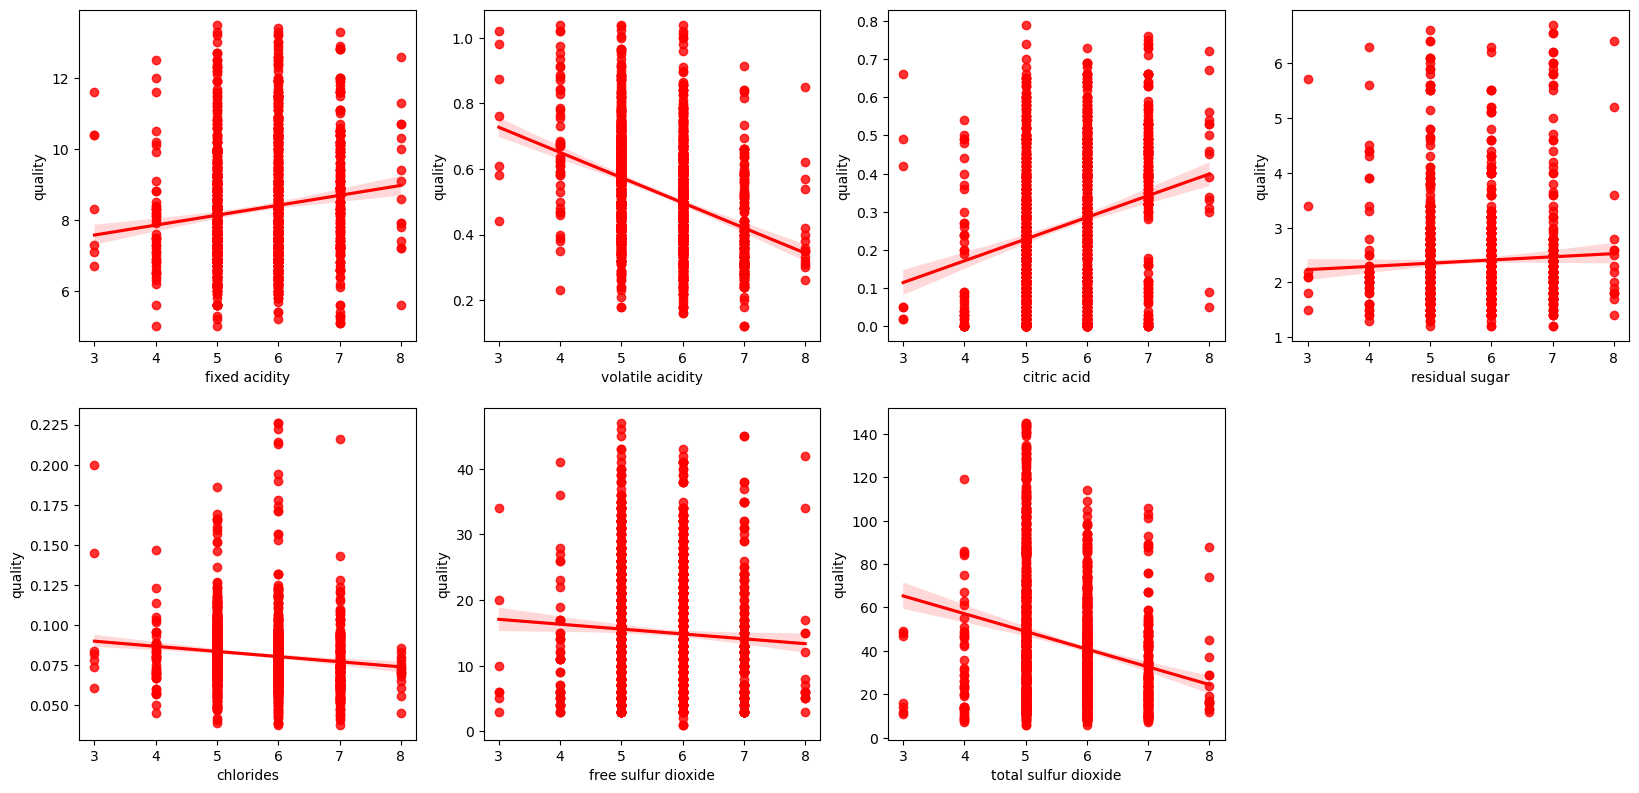

In [157]:
plt.figure(figsize=(20, 25))
p=1
for i in df.columns:
    if p<=7:
        plt.subplot(5,4,p)
        sns.regplot(x='quality',y = i, data=df, color='r')
        plt.xlabel(i)
        plt.ylabel('quality')
    p+=1
plt.show()

1.  This prediction shows that there is positive correlation with fixed acidity and citric acid but not highly correlated.
2.  There is negative correlation between volatile acidity and total sulphur dioxide with quality.
3.  Residual sugar and free sulfur dioxide have neutral correlation with respect to the quality.

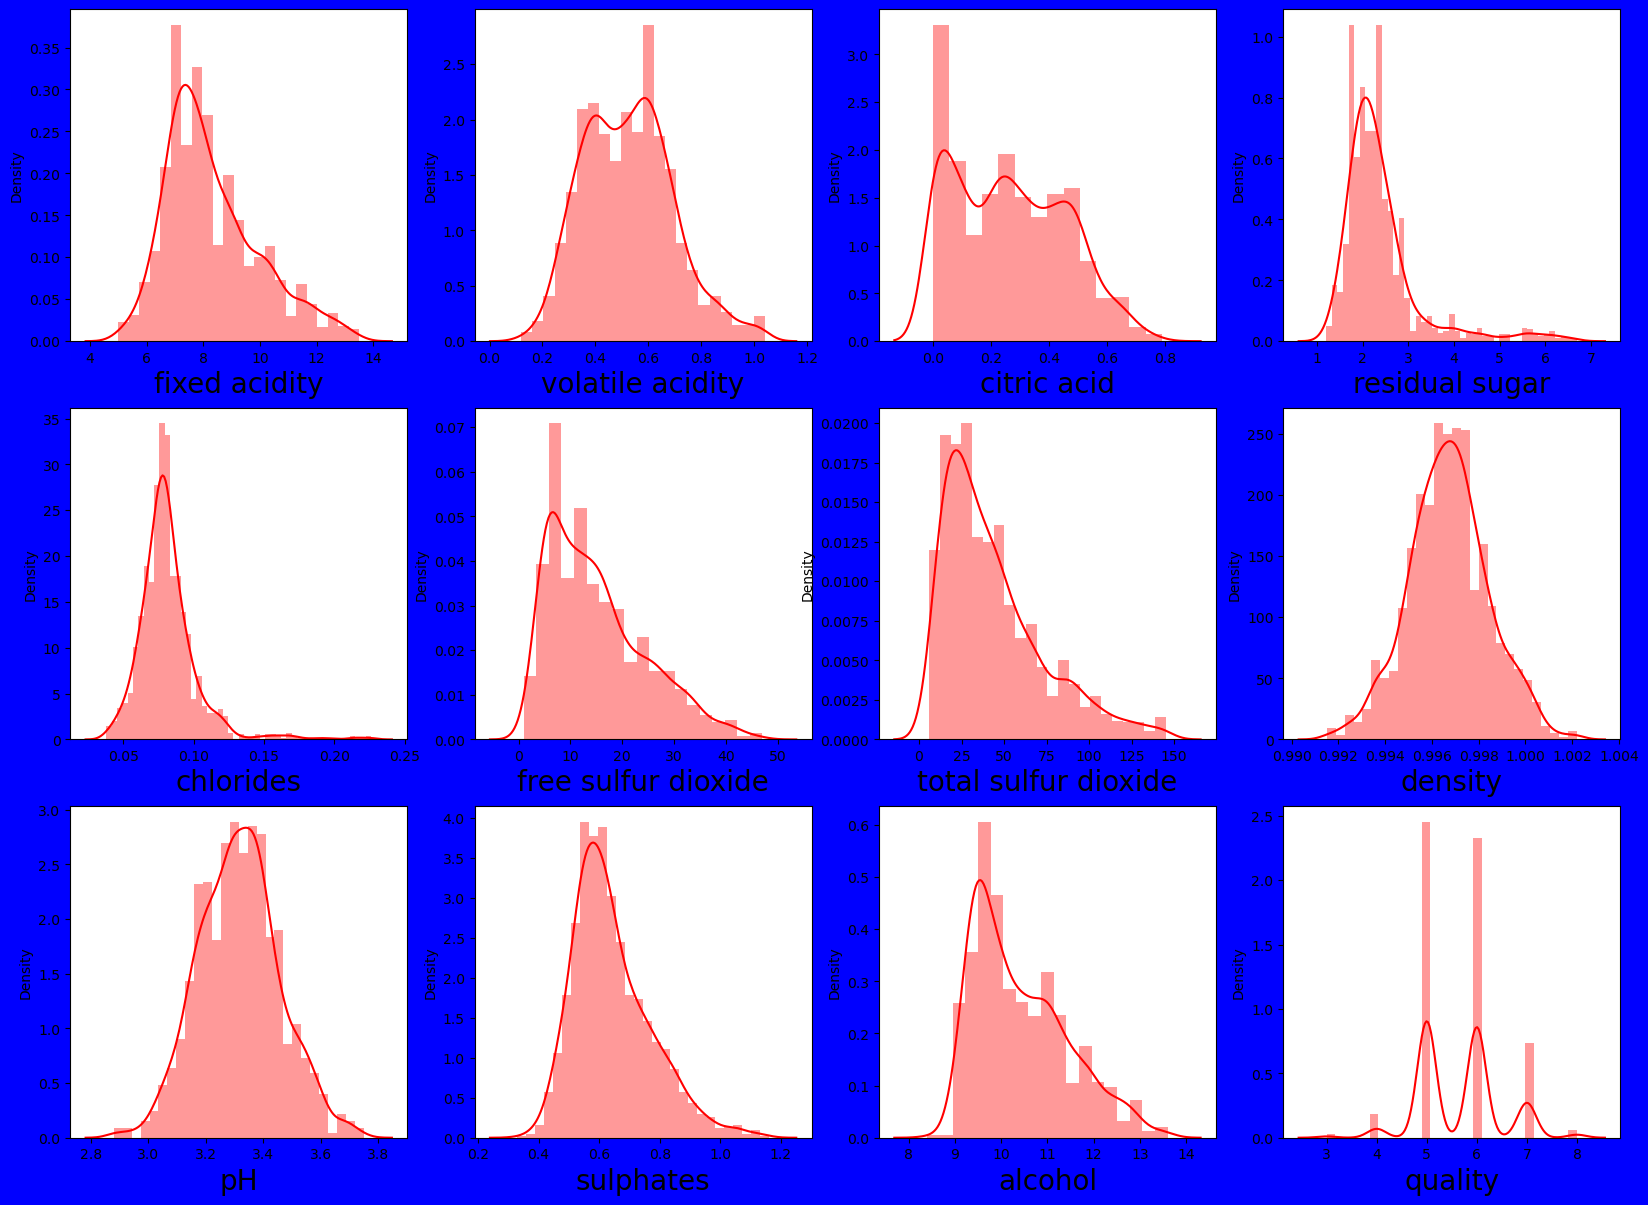

In [158]:
plt.figure(figsize=(20, 25), facecolor='blue')
p=1
for column in df:
    if p<=13:
        ax=plt.subplot(5,4,p)
        sns.distplot(df[column], color='red')
        plt.xlabel(column, fontsize=20)
        
    p+=1
plt.show()



1. Fixed acidity, volatile acidity, citric acid, sulphates, pH, alcohol and density are positively related here.
2. Again residual sugar, free sulfur dioxide, total sulfur dioxide, and chlorides show a right skewed curve. 

# Multivariate Analysis/(Pairplots)


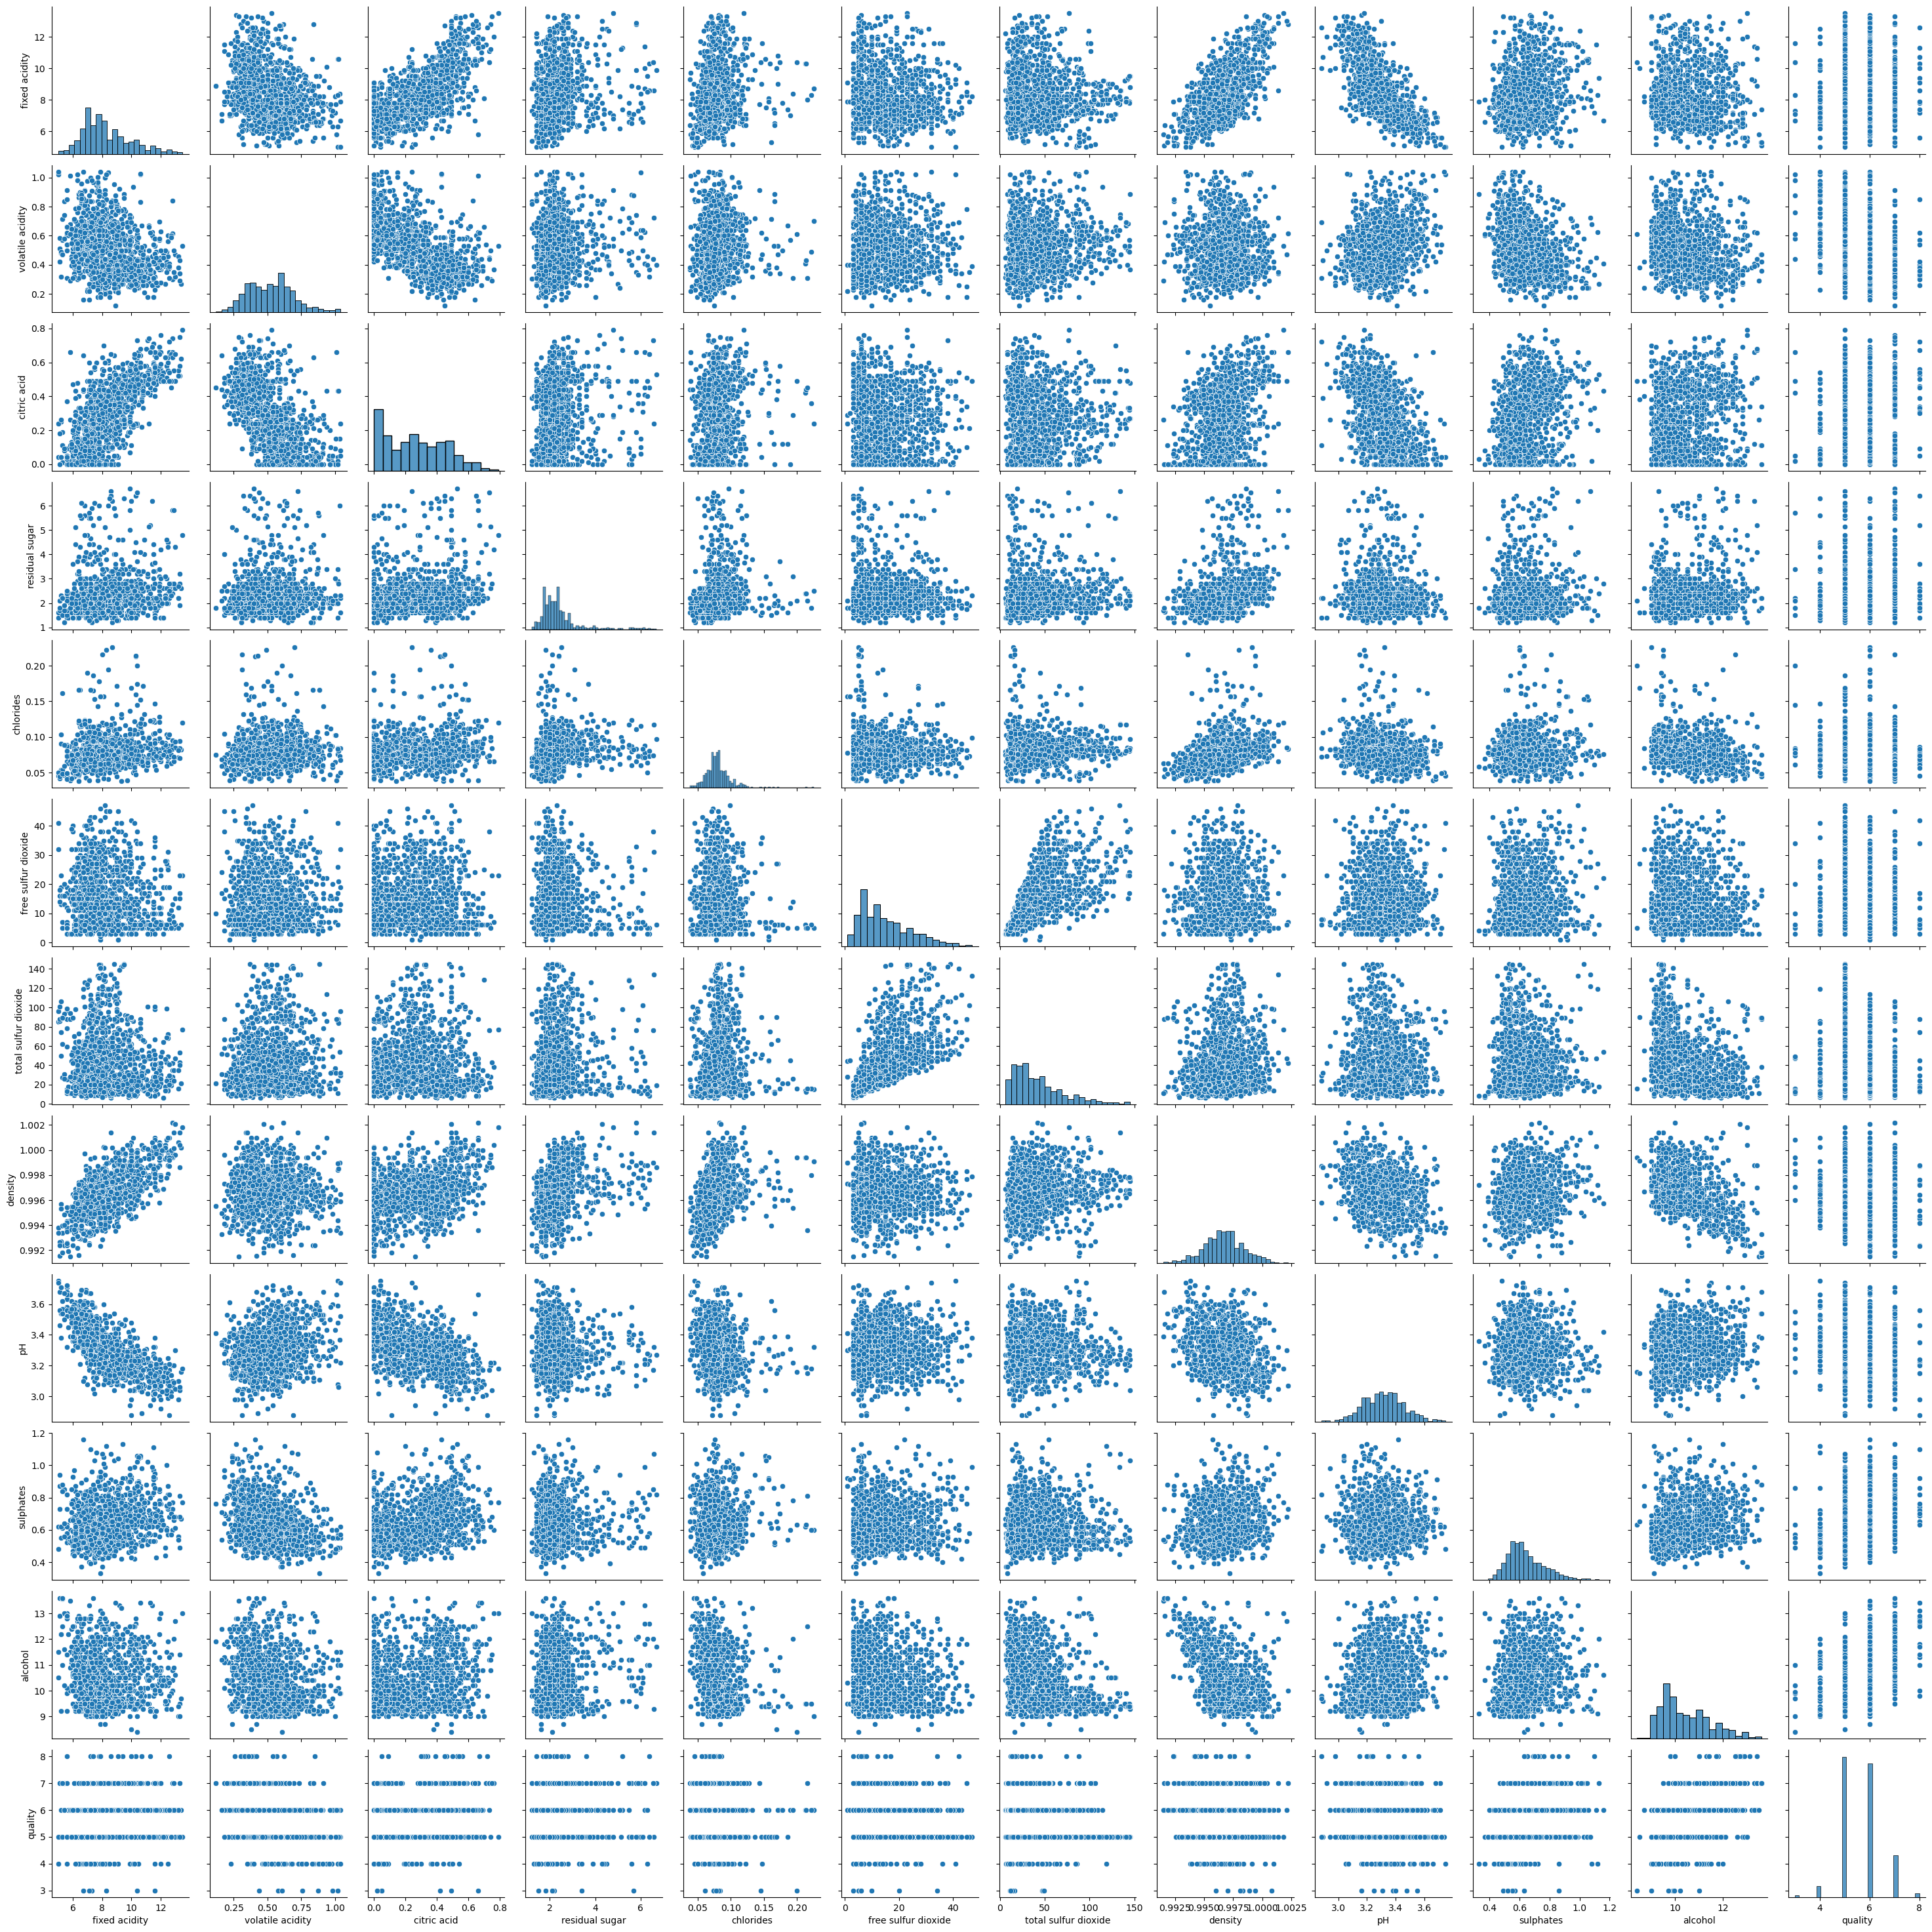

In [159]:
sns.pairplot(data=df, palette="Dark2")

Here we can see each independent variable's relation with other independent variables.  

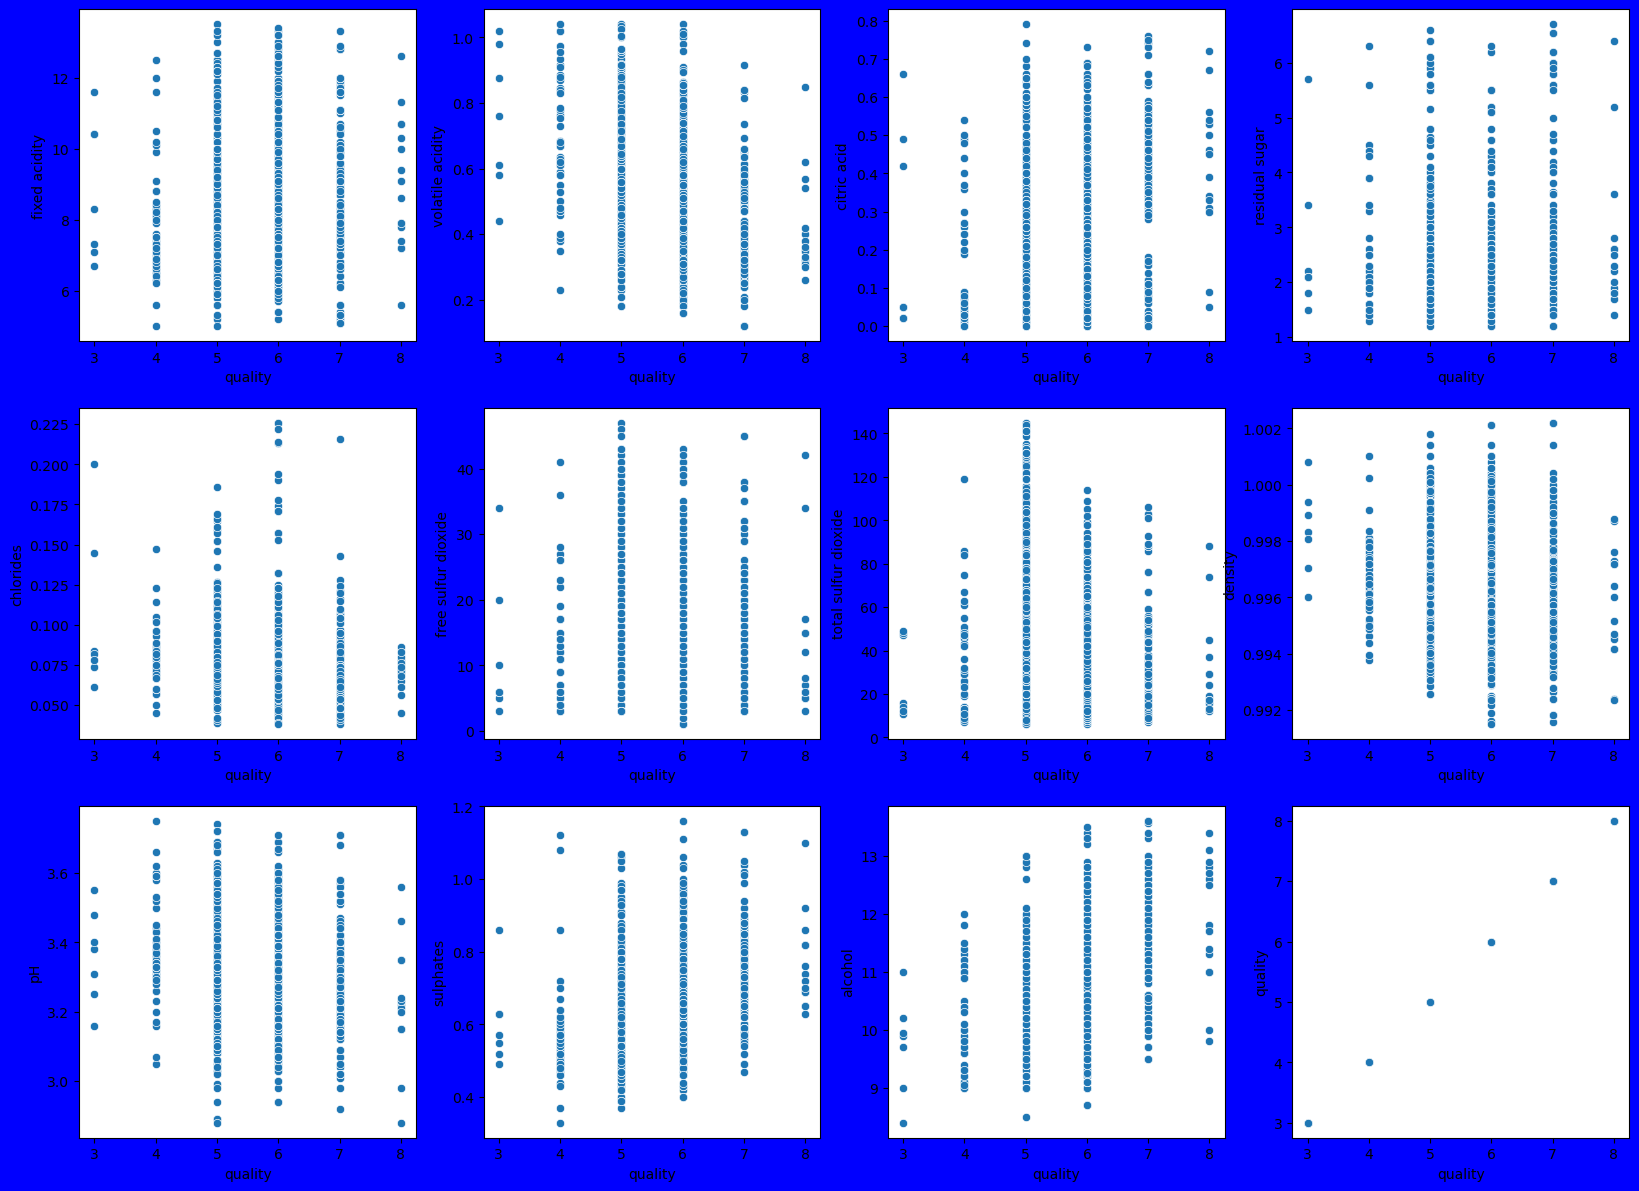

In [160]:
plt.figure(figsize=(20, 25), facecolor='blue')
p=1
for i in df:
    if p<=13:
        ax=plt.subplot(5,4,p)
        sns.scatterplot(x='quality', y=i, data=df) 
        plt.xlabel('quality')
        plt.ylabel(i)         
    p+=1
plt.show()

# Checking skewness for the data

In [161]:
df.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
quality                 0.248823
dtype: float64

Sknewness should be between range of -0.5 to +0.5
On this basis, we can observe that fixed acidity, residual sugar, chlorides, free and total sulphur dioxide as well as sulphates and alcohol have skewness.
To remove the skewness, we can apply cuberoot method here.

In [193]:
df['fixed acidity']=np.cbrt(df['fixed acidity'])
df['residual sugar']=np.cbrt(df['residual sugar'])
df['chlorides']=np.cbrt(df['chlorides'])
df['free sulfur dioxide']=np.cbrt(df['free sulfur dioxide'])
df['total sulfur dioxide']=np.cbrt(df['total sulfur dioxide'])
df['sulphates']=np.cbrt(df['sulphates'])
df['alcohol']=np.cbrt(df['alcohol'])

In [163]:
df.skew()

fixed acidity           0.527560
volatile acidity        0.392097
citric acid             0.292600
residual sugar          1.629756
chlorides               1.056128
free sulfur dioxide     0.127793
total sulfur dioxide    0.343010
density                 0.055543
pH                      0.113039
sulphates               0.526494
alcohol                 0.643830
quality                 0.248823
dtype: float64

Again, we can see that residual sugar and chlorides has skewness values of 1 and alcohol has 0.6 that is >0.5.
We need to apply different methods here, like boxcox and try to remove the skewness.

In [194]:
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.254872     0.670553   
volatile acidity          -0.254872          1.000000    -0.552496   
citric acid                0.670553         -0.552496     1.000000   
residual sugar             0.154116          0.017826     0.165255   
chlorides                  0.164063          0.094520     0.192801   
free sulfur dioxide       -0.173739          0.006006    -0.080850   
total sulfur dioxide      -0.115392          0.076637     0.009224   
density                    0.673615          0.022026     0.364947   
pH                        -0.699735          0.234937    -0.541904   
sulphates                  0.196146         -0.289979     0.327678   
alcohol                   -0.082908         -0.201828     0.109388   
quality                    0.118123         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.154116   0.164063            -0.173739   
volatile acidity            0.017826   0.094520             0.006006   
citric acid                 0.165255   0.192801            -0.080850   
residual sugar              1.000000   0.093468             0.119639   
chlorides                   0.093468   1.000000            -0.007952   
free sulfur dioxide         0.119639  -0.007952             1.000000   
total sulfur dioxide        0.171429   0.068634             0.757872   
density                     0.401010   0.303230            -0.036124   
pH                         -0.091009  -0.282776             0.089701   
sulphates                   0.017832   0.287061             0.054612   
alcohol                     0.070057  -0.281050            -0.079680   
quality                     0.020657  -0.161767            -0.051243   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.115392  0.673615 -0.699735   0.196146   
volatile acidity                  0.076637  0.022026  0.234937  -0.289979   
citric acid                       0.009224  0.364947 -0.541904   0.327678   
residual sugar                    0.171429  0.401010 -0.091009   0.017832   
chlorides                         0.068634  0.303230 -0.282776   0.287061   
free sulfur dioxide               0.757872 -0.036124  0.089701   0.054612   
total sulfur dioxide              1.000000  0.095461 -0.031335   0.044914   
density                           0.095461  1.000000 -0.341699   0.161109   
pH                               -0.031335 -0.341699  1.000000  -0.168561   
sulphates                         0.044914  0.161109 -0.168561   1.000000   
alcohol                          -0.232059 -0.492844  0.206050   0.123558   
quality                          -0.180815 -0.174919 -0.057731   0.292537   

                       alcohol   quality  
fixed acidity        -0.082908  0.118123  
volatile acidity     -0.201828 -0.390558  
citric acid           0.109388  0.226373  
residual sugar        0.070057  0.020657  
chlorides            -0.281050 -0.161767  
free sulfur dioxide  -0.079680 -0.051243  
total sulfur dioxide -0.232059 -0.180815  
density              -0.492844 -0.174919  
pH                    0.206050 -0.057731  
sulphates             0.123558  0.292537  
alcohol               1.000000  0.476928  
quality               0.476928  1.000000

<AxesSubplot:>

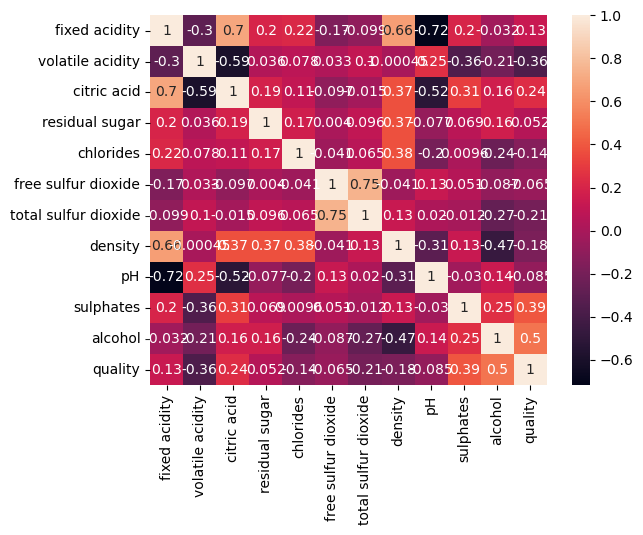

In [166]:
sns.heatmap(df.corr(), annot=True)

Here we can see that fixed acidity is positively correlated iwth density and citric acid.

In [217]:
x=df.iloc[:, 0:11]
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
1594     10.5  
1595     11.2  
1596     11.0  
1597     10.2  
1598     11.0  

[1599 rows x 11 columns]

# VIF (variance inflation factor)

In [218]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF=pd.DataFrame()
VIF["VIF values"]=[variance_inflation_factor(x.values, i) for i in range (len(x.columns))]
VIF["features"]=x.columns
VIF

VIF values              features
0     74.452265         fixed acidity
1     17.060026      volatile acidity
2      9.183495           citric acid
3      4.662992        residual sugar
4      6.554877             chlorides
5      6.442682   free sulfur dioxide
6      6.519699  total sulfur dioxide
7   1479.287209               density
8   1070.967685                    pH
9     21.590621             sulphates
10   124.394866               alcohol

In [197]:
#We can clearly observe here that highest variance is seen in the density column. To reduce multicollinearity issue, We cand drop 
#this column, whicn in turn reduces the values of other correlated columns.




In [219]:
x=x.drop(["density"], axis=1, inplace=True)


In [206]:
x

# SMOTE Techniques
Can be applied here as taget(y) had just 6 unique values, so the dataset is biased. In order to balance the imbalanced data, we can apply smort here(synthetic minority oversampling technique)¶
pip install imbalanced-learn

In [213]:
pip install imbalanced-learn 

Note: you may need to restart the kernel to use updated packages.


In [226]:
import numpy
numpy.__version__

'1.21.5'

In [227]:
import sklearn
sklearn.__version__

'1.0.2'

In [228]:
x=df.iloc[:,0:11]
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
1594     10.5  
1595     11.2  
1596     11.0  
1597     10.2  
1598     11.0  

[1599 rows x 11 columns]

In [229]:
y=df.iloc[:, -1]
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [230]:
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [231]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x1,y1=smt.fit_resample(x, y)

In [232]:
y1.value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

In [233]:
y=y1

In [100]:
y

0       5
1       5
2       5
3       6
4       5
       ..
3697    8
3698    8
3699    8
3700    8
3701    8
Name: quality, Length: 3702, dtype: int64

In [234]:
x=x1
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          7.400000          0.700000     0.000000        1.900000   0.076000   
1          7.800000          0.880000     0.000000        2.600000   0.098000   
2          7.800000          0.760000     0.040000        2.300000   0.092000   
3         11.200000          0.280000     0.560000        1.900000   0.075000   
4          7.400000          0.700000     0.000000        1.900000   0.076000   
...             ...               ...          ...             ...        ...   
4081      11.042995          0.305134     0.642150        2.491938   0.075893   
4082       5.595591          0.834129     0.049118        1.417634   0.044956   
4083       7.274969          0.334819     0.333213        1.705355   0.061375   
4084       9.151876          0.382708     0.510375        1.972920   0.072556   
4085       5.180808          0.445313     0.164061        1.927677   0.054214   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               11.000000             34.000000  0.997800  3.510000   
1               25.000000             67.000000  0.996800  3.200000   
2               15.000000             54.000000  0.997000  3.260000   
3               17.000000             60.000000  0.998000  3.160000   
4               11.000000             34.000000  0.997800  3.510000   
...                   ...                   ...       ...       ...   
4081             6.000000             23.161233  0.997581  3.011372   
4082            12.705365             87.955915  0.992329  3.557355   
4083             3.160647             12.946451  0.995955  3.236426   
4084             6.827080             16.172920  0.994928  3.199625   
4085            22.254537             63.379762  0.991375  3.640445   

      sulphates    alcohol  
0      0.560000   9.400000  
1      0.680000   9.800000  
2      0.650000   9.800000  
3      0.580000   9.800000  
4      0.560000   9.400000  
...         ...        ...  
4081   0.868656  10.724471  
4082   0.820000  12.948494  
4083   1.078045  10.091033  
4084   0.729772  12.361664  
4085   0.768929  14.000000  

[4086 rows x 11 columns]

And we have applied SMOTE here, which means oversampling has been done here in order to balance the dataset and remove bias.

# Scaling techniques applied here as columns have unequal float values

In [235]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

In [236]:
st=StandardScaler()

In [237]:
x=pd.DataFrame(st.fit_transform(x))
x

0         1         2         3         4         5         6   \
0    -0.582032  0.464307 -1.355178 -0.573293 -0.285546 -0.259957 -0.107057   
1    -0.339925  1.186002 -1.355178  0.006336  0.203836  1.190373  1.048756   
2    -0.339925  0.704872 -1.157007 -0.242077  0.070368  0.154423  0.593436   
3     1.717977 -1.219647  1.419223 -0.573293 -0.307791  0.361613  0.803584   
4    -0.582032  0.464307 -1.355178 -0.573293 -0.285546 -0.259957 -0.107057   
...        ...       ...       ...       ...       ...       ...       ...   
4081  1.622947 -1.118873  1.826216 -0.083144 -0.287937 -0.777932 -0.486681   
4082 -1.674178  1.002088 -1.111832 -0.972712 -0.976111 -0.083290  1.782730   
4083 -0.657709 -0.999854  0.295655 -0.734467 -0.610877 -1.072075 -0.844450   
4084  0.478318 -0.807848  1.173367 -0.512912 -0.362150 -0.692251 -0.731444   
4085 -1.925232 -0.556839 -0.542374 -0.550375 -0.770164  0.905957  0.921959   

            7         8         9         10  
0     0.688104  1.176084 -0.629656 -1.117295  
1     0.154079 -0.823487  0.126034 -0.778545  
2     0.260884 -0.436473 -0.062889 -0.778545  
3     0.794909 -1.081496 -0.503707 -0.778545  
4     0.688104  1.176084 -0.629656 -1.117295  
...        ...       ...       ...       ...  
4081  0.571101 -2.040179  1.314081  0.004365  
4082 -2.233299  1.481534  1.007671  1.887830  
4083 -0.297162 -0.588531  2.632686 -0.532077  
4084 -0.845723 -0.825907  0.439466  1.390860  
4085 -2.743249  2.017482  0.686058  2.778323  

[4086 rows x 11 columns]

We need not apply scaling to the target and one can see that scaling has been applied where the dataset has uniform float values

We can clearly observe here that highest variance is seen in the fixed acidity column. EVen in sns.corr() map also, it was 
evidence that fixed acidity had multicollinearity issue. We cand drop this column in order to reduce it, whicn in turn
reduces the values of density. 

# Splitting the data into training and testing

In [245]:
x=x1
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          7.400000          0.700000     0.000000        1.900000   0.076000   
1          7.800000          0.880000     0.000000        2.600000   0.098000   
2          7.800000          0.760000     0.040000        2.300000   0.092000   
3         11.200000          0.280000     0.560000        1.900000   0.075000   
4          7.400000          0.700000     0.000000        1.900000   0.076000   
...             ...               ...          ...             ...        ...   
4081      11.042995          0.305134     0.642150        2.491938   0.075893   
4082       5.595591          0.834129     0.049118        1.417634   0.044956   
4083       7.274969          0.334819     0.333213        1.705355   0.061375   
4084       9.151876          0.382708     0.510375        1.972920   0.072556   
4085       5.180808          0.445313     0.164061        1.927677   0.054214   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               11.000000             34.000000  0.997800  3.510000   
1               25.000000             67.000000  0.996800  3.200000   
2               15.000000             54.000000  0.997000  3.260000   
3               17.000000             60.000000  0.998000  3.160000   
4               11.000000             34.000000  0.997800  3.510000   
...                   ...                   ...       ...       ...   
4081             6.000000             23.161233  0.997581  3.011372   
4082            12.705365             87.955915  0.992329  3.557355   
4083             3.160647             12.946451  0.995955  3.236426   
4084             6.827080             16.172920  0.994928  3.199625   
4085            22.254537             63.379762  0.991375  3.640445   

      sulphates    alcohol  
0      0.560000   9.400000  
1      0.680000   9.800000  
2      0.650000   9.800000  
3      0.580000   9.800000  
4      0.560000   9.400000  
...         ...        ...  
4081   0.868656  10.724471  
4082   0.820000  12.948494  
4083   1.078045  10.091033  
4084   0.729772  12.361664  
4085   0.768929  14.000000  

[4086 rows x 11 columns]

In [261]:
y1

0       5
1       5
2       5
3       6
4       5
       ..
4081    8
4082    8
4083    8
4084    8
4085    8
Name: quality, Length: 4086, dtype: int64

In [263]:
y=y1
y

0       5
1       5
2       5
3       6
4       5
       ..
4081    8
4082    8
4083    8
4084    8
4085    8
Name: quality, Length: 4086, dtype: int64

In [246]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.30, random_state=42)

In [264]:
x_train.shape

(2860, 11)

In [265]:
y_train.shape

(2860,)

In [266]:
x_test.shape

(1226, 11)

In [267]:
y_test.shape

(1226,)

# The fit method trains the model

In [271]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print("Accuracy_Score is:", accuracy_score(y_test, pred_lr))
print("Confusion_Matrix is:", confusion_matrix(y_test, pred_lr))
print("Classification_Report is:", classification_report(y_test, pred_lr))

Accuracy_Score is: 0.46818923327895595
Confusion_Matrix is: [[144  39  15   2   0   0]
 [ 29 111  44   1   5   7]
 [ 36  61  92  16   8   5]
 [ 28  60  36  22  34  40]
 [ 10  12   1  18  70  77]
 [  0   0   0   1  67 135]]
Classification_Report is:               precision    recall  f1-score   support

           3       0.58      0.72      0.64       200
           4       0.39      0.56      0.46       197
           5       0.49      0.42      0.45       218
           6       0.37      0.10      0.16       220
           7       0.38      0.37      0.38       188
           8       0.51      0.67      0.58       203

    accuracy                           0.47      1226
   macro avg       0.45      0.47      0.45      1226
weighted avg       0.45      0.47      0.44      1226



The accuracy score here is just 47% 

In [272]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
pred_rf=rf.predict(x_test)
print("Accuracy_Score is:", accuracy_score(y_test, pred_rf))
print("Confusion_Matrix is:", confusion_matrix(y_test, pred_rf))
print("Classification_Report is:", classification_report(y_test, pred_rf))

Accuracy_Score is: 0.8474714518760196
Confusion_Matrix is: [[200   0   0   0   0   0]
 [  0 189   2   6   0   0]
 [  8  15 158  34   3   0]
 [  3  12  61 110  29   5]
 [  0   0   2   5 179   2]
 [  0   0   0   0   0 203]]
Classification_Report is:               precision    recall  f1-score   support

           3       0.95      1.00      0.97       200
           4       0.88      0.96      0.92       197
           5       0.71      0.72      0.72       218
           6       0.71      0.50      0.59       220
           7       0.85      0.95      0.90       188
           8       0.97      1.00      0.98       203

    accuracy                           0.85      1226
   macro avg       0.84      0.86      0.85      1226
weighted avg       0.84      0.85      0.84      1226



 RandomForestClassifier Accuracy score is good at 85%.

In [274]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier() #n_estimators=100, random_state=42)default
ad.fit(x_train, y_train)
pred_ad=ad.predict(x_test)
print("Accuracy_Score is:", accuracy_score(y_test, pred_ad))
print("Confusion_Matrix is:", confusion_matrix(y_test, pred_ad))
print("Classification_Report is:", classification_report(y_test, pred_ad))

Accuracy_Score is: 0.2936378466557912
Confusion_Matrix is: [[200   0   0   0   0   0]
 [167   2   0   0  26   2]
 [179   1   0   0  36   2]
 [127   0   0   0  67  26]
 [ 36   1   0   0  97  54]
 [  0   0   0   0 142  61]]
Classification_Report is:               precision    recall  f1-score   support

           3       0.28      1.00      0.44       200
           4       0.50      0.01      0.02       197
           5       0.00      0.00      0.00       218
           6       0.00      0.00      0.00       220
           7       0.26      0.52      0.35       188
           8       0.42      0.30      0.35       203

    accuracy                           0.29      1226
   macro avg       0.24      0.30      0.19      1226
weighted avg       0.24      0.29      0.19      1226



The accuracy score for Adaboosting is 29%

In [275]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(x_train, y_train)
pred_etc=etc.predict(x_test)
print("Accuracy_Score is:", accuracy_score(y_test, pred_etc))
print("Confusion_Matrix is:", confusion_matrix(y_test, pred_etc))
print("Classification_Report is:", classification_report(y_test, pred_etc))


Accuracy_Score is: 0.8597063621533442
Confusion_Matrix is: [[200   0   0   0   0   0]
 [  0 195   1   1   0   0]
 [  6  12 161  32   7   0]
 [  1  15  55 115  29   5]
 [  0   0   1   4 180   3]
 [  0   0   0   0   0 203]]
Classification_Report is:               precision    recall  f1-score   support

           3       0.97      1.00      0.98       200
           4       0.88      0.99      0.93       197
           5       0.74      0.74      0.74       218
           6       0.76      0.52      0.62       220
           7       0.83      0.96      0.89       188
           8       0.96      1.00      0.98       203

    accuracy                           0.86      1226
   macro avg       0.86      0.87      0.86      1226
weighted avg       0.85      0.86      0.85      1226



Here we have 86% accuracy score which is almost equal to the DecisionTreeClassifier

In [276]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train, y_train)
pred_svc=svc.predict(x_test)
print("Accuracy_Score is:", accuracy_score(y_test, pred_svc))
print("Confusion_Matrix is:", confusion_matrix(y_test, pred_svc))
print("Classification_Report is:", classification_report(y_test, pred_svc))


Accuracy_Score is: 0.42251223491027734
Confusion_Matrix is: [[142   0   6  32  20   0]
 [ 80   0  47  42  23   5]
 [ 38   1 101  49  13  16]
 [ 39   0  38  63  51  29]
 [ 27   0  10  30  69  52]
 [ 10   0   1  10  39 143]]
Classification_Report is:               precision    recall  f1-score   support

           3       0.42      0.71      0.53       200
           4       0.00      0.00      0.00       197
           5       0.50      0.46      0.48       218
           6       0.28      0.29      0.28       220
           7       0.32      0.37      0.34       188
           8       0.58      0.70      0.64       203

    accuracy                           0.42      1226
   macro avg       0.35      0.42      0.38      1226
weighted avg       0.35      0.42      0.38      1226



With supportvectorclassifier, we can get 42% accuracy score

In [277]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train, y_train)
pred_gb=gb.predict(x_test)
print("Accuracy_Score is:", accuracy_score(y_test, pred_gb))
print("Confusion_Matrix is:", confusion_matrix(y_test, pred_gb))
print("Classification_Report is:", classification_report(y_test, pred_gb))


Accuracy_Score is: 0.802610114192496
Confusion_Matrix is: [[200   0   0   0   0   0]
 [  1 177   9  10   0   0]
 [  6  18 147  43   4   0]
 [  4  15  60 102  35   4]
 [  0   0   1  23 156   8]
 [  0   0   0   0   1 202]]
Classification_Report is:               precision    recall  f1-score   support

           3       0.95      1.00      0.97       200
           4       0.84      0.90      0.87       197
           5       0.68      0.67      0.68       218
           6       0.57      0.46      0.51       220
           7       0.80      0.83      0.81       188
           8       0.94      1.00      0.97       203

    accuracy                           0.80      1226
   macro avg       0.80      0.81      0.80      1226
weighted avg       0.79      0.80      0.80      1226



From gradientboostingclassifier, the model gives 80% accuracy score

In [278]:
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier()
bc.fit(x_train, y_train)
pred_bc=bc.predict(x_test)
print("Accuracy_Score is:", accuracy_score(y_test, pred_bc))
print("Confusion_Matrix is:", confusion_matrix(y_test, pred_bc))
print("Classification_Report is:", classification_report(y_test, pred_bc))


Accuracy_Score is: 0.8017944535073409
Confusion_Matrix is: [[198   0   0   2   0   0]
 [  1 187   4   3   2   0]
 [  7  29 140  36   6   0]
 [  4  15  62  98  39   2]
 [  0   0   1  20 163   4]
 [  0   0   1   0   5 197]]
Classification_Report is:               precision    recall  f1-score   support

           3       0.94      0.99      0.97       200
           4       0.81      0.95      0.87       197
           5       0.67      0.64      0.66       218
           6       0.62      0.45      0.52       220
           7       0.76      0.87      0.81       188
           8       0.97      0.97      0.97       203

    accuracy                           0.80      1226
   macro avg       0.80      0.81      0.80      1226
weighted avg       0.79      0.80      0.79      1226



The BaggingClassifier also gives 80% score

# Cross_Validation Method

In [279]:
from sklearn.model_selection import cross_val_score


In [297]:
score=cross_val_score(lr, x, y, cv=5)
print(score)
print(score.mean())
print("The difference between Accuracy_score and Cross_Val_Score is:",accuracy_score(y_test, pred_lr)-score.mean()*100)

[0.47188264 0.44308446 0.47001224 0.46144431 0.45654835]
0.4605943983743973
The difference between Accuracy_score and Cross_Val_Score is: -45.59125060416078


In [287]:
score=cross_val_score(rf, x, y)
print(score)
print(score.mean())
print("The difference between Accuracy_score and Cross_Val_Score is:",accuracy_score(y_test, pred_rf)-score.mean()*100)

[0.80317848 0.8004896  0.79069767 0.81762546 0.80660955]
0.8037201521458733
The difference between Accuracy_score and Cross_Val_Score is: -79.52454376271132


In [288]:
score=cross_val_score(ad, x, y)
print(score)
print(score.mean())
print("The difference between Accuracy_score and Cross_Val_Score is:",accuracy_score(y_test, pred_ad)-score.mean()*100)

[0.37652812 0.40146879 0.37086903 0.39290086 0.3378213 ]
0.3759176185759218
The difference between Accuracy_score and Cross_Val_Score is: -37.29812401093639


In [289]:
score=cross_val_score(etc, x, y)
print(score)
print(score.mean())
print("The difference between Accuracy_score and Cross_Val_Score is:",accuracy_score(y_test, pred_etc)-score.mean()*100)

[0.81051345 0.81150551 0.81395349 0.80905753 0.8127295 ]
0.8115518938929173
The difference between Accuracy_score and Cross_Val_Score is: -80.29548302713837


In [290]:
score=cross_val_score(bc, x, y, cv=5)
print(score)
print(score.mean())
print("The difference between Accuracy_score and Cross_Val_Score is:",accuracy_score(y_test, pred_bc)-score.mean()*100)

[0.77750611 0.77233782 0.76132191 0.76376989 0.77600979]
0.7701891049908276
The difference between Accuracy_score and Cross_Val_Score is: -76.21711604557542


In [292]:
score=cross_val_score(svc, x, y)
print(score)
print(score.mean())
print("The difference between Accuracy_score and Cross_Val_Score is:",accuracy_score(y_test, pred_svc)-score.mean()*100)

[0.4400978  0.41982864 0.35128519 0.38188494 0.36597307]
0.3918139295472433
The difference between Accuracy_score and Cross_Val_Score is: -38.75888071981405


In [293]:
score=cross_val_score(gb, x, y)
print(score)
print(score.mean())
print("The difference between Accuracy_score and Cross_Val_Score is:",accuracy_score(y_test, pred_gb)-score.mean()*100)

[0.75672372 0.75642595 0.75275398 0.79681763 0.78580171]
0.7697045963974587
The difference between Accuracy_score and Cross_Val_Score is: -76.16784952555338


From all the above, the ExtraTreeClassifier gives the best accuracy which is 81%. 
As there are negative value for the difference, we conclude that model is not fit properly or underfitting.

# Extra Tree Calssifier is our best Model

# Hyperparameter Tuning
#GridSearchCV

In [298]:
#for ExtraTreesClassifer
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['gini', 'entropy'],
            'random_state':[10.50, 1000], 
            'max_depth':[0, 10, 20], 'n_jobs':[-2, -2, 1],
            'n_estimators':[50, 100, 200, 300]}

Entropy is the measure of randomness, random_state 1000 random generator takes 1000 at each time, n_jobs is number of jobs
at a time, estimator 300 means 300 trees will taken at a time for the algorithm to work on it and max-depth of tree is 20.

In [300]:
GCV=GridSearchCV(ExtraTreesClassifier(), parameters, cv=5)


In [ ]:
GCV.fit(x_train, y_train)

In [303]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 1000}

In [306]:
Final_model=ExtraTreesClassifier(criterion='entropy', max_depth=10, n_estimators=200, n_jobs=-2, random_state=1000)
Final_model.fit(x_train, y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test, pred)
print(acc*100)


80.66884176182708


# My model with ExtraTreesClassifer is giving 80% accurcy score.

# Saving the best model with pickle or joblib methods

In [314]:
#Saving or serialization
import pickle
filename='RedWineQuality.pkl'
pickle.dump(Final_model, open(filename, 'wb'))

In [316]:
#Loading the model again or deserialization
import pickle
loaded_Final_model=pickle.load( open('RedWineQuality.pkl', 'rb'))
result=loaded_Final_model.score(x_test, y_test)                               
print(result*100)

80.66884176182708


In [320]:
Conclusion=pd.DataFrame([loaded_Final_model.predict(x_test)[:],y_test[:]], index=["predicted", "original"])
Conclusion                                                                              

0     1     2     3     4     5     6     7     8     9     ...  \
predicted     6     5     7     7     4     4     5     5     5     5  ...   
original      6     5     7     7     4     4     5     6     5     6  ...   

           1216  1217  1218  1219  1220  1221  1222  1223  1224  1225  
predicted     3     8     8     5     5     3     5     8     3     5  
original      3     6     8     6     5     3     5     8     3     6  

[2 rows x 1226 columns]